In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller

In [ ]:
path_to_csv = "/content/drive/MyDrive/UIT - Semester 6/Data Analysis in Business/Dataset"

In [ ]:
#Đọc dữ liệu
df = pd.read_csv(path_to_csv + '/TSLA.csv', index_col=0, parse_dates=True)

In [ ]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,20.362667,20.688000,20.336666,20.435333,20.435333,64393500
2017-12-04,20.433332,20.551332,20.040667,20.346666,20.346666,87526500
2017-12-05,20.133333,20.533333,20.066668,20.246668,20.246668,69697500
2017-12-06,20.006666,20.892668,20.000000,20.884001,20.884001,107929500
2017-12-07,20.799999,21.242001,20.736668,20.749332,20.749332,71709000
2017-12-08,20.973333,21.132000,20.750668,21.008667,21.008667,52027500
2017-12-11,20.975332,21.934000,20.916668,21.927334,21.927334,119070000
2017-12-12,22.030001,22.762667,22.002001,22.735332,22.735332,130998000
2017-12-13,22.728666,22.948000,22.433332,22.601999,22.601999,93322500


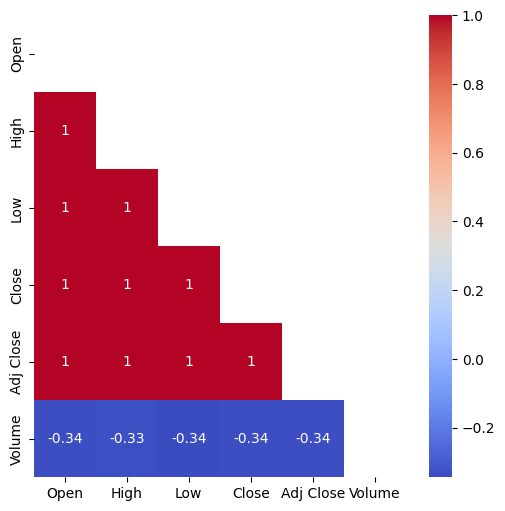

In [ ]:
mask = np.triu(df.corr())
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), mask=mask, xticklabels=True, yticklabels=True, cmap='coolwarm', annot=True)
plt.show()

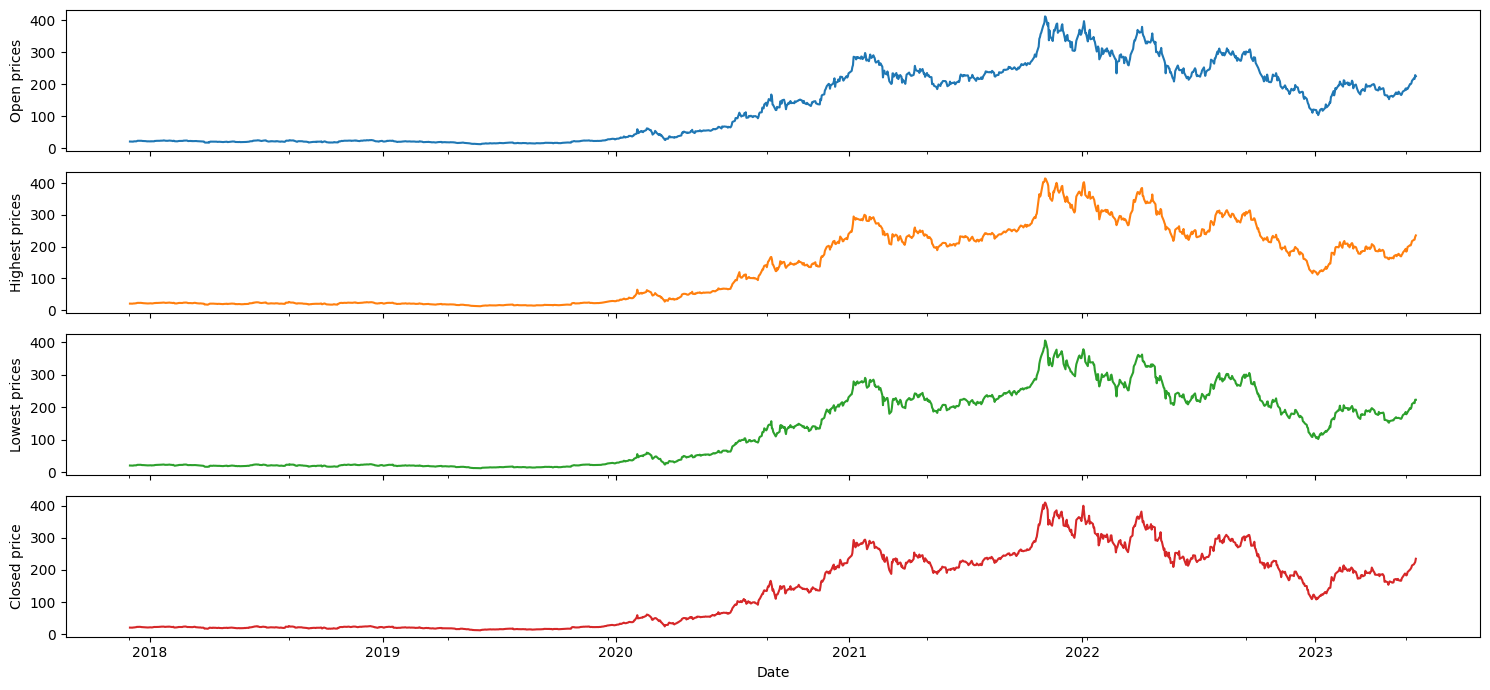

In [ ]:
df = df[['Open','High', 'Low', 'Close']]
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(15,7))
df.plot(subplots=True, ax=ax, legend=False)
y_label = ['Open prices','Highest prices', 'Lowest prices','Closed price']
for a in range(len(ax)):
    ax[a].set_ylabel(f"{y_label[a]}")
plt.tight_layout()
plt.show()

In [ ]:
#Chia dữ liệu theo tỉ lệ 7:2:1
from sklearn.model_selection import train_test_split

total_length = len(df)

train_length = int(total_length * 0.7)  # 70% for training
test_length = int(total_length * 0.2)  # 20% for testing
validate_length = total_length - train_length - test_length  # Remaining 10% for validation

train_data = df[:train_length]
test_data = df[train_length:train_length + test_length]
validate_data = df[train_length + test_length:]

In [ ]:
#Kiểm tra tính dừng với ADF
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data is stationary")
        print("---------------------------------------")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")
        print("------------------------------------------")

In [ ]:
#Kết quả kiểm tra của dữ liệu gốc
adf_test(train_data['Open'], 'Open prices')
adf_test(train_data['High'], 'Highest prices')
adf_test(train_data['Low'], 'Lowest prices')
adf_test(train_data['Close'], 'Closed prices')

Augmented Dickey-Fuller Test: Open prices
ADF test statistic        0.476748
p-value                   0.984149
# lags used              19.000000
# observations          951.000000
critical value (1%)      -3.437245
critical value (5%)      -2.864584
critical value (10%)     -2.568391
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
------------------------------------------
Augmented Dickey-Fuller Test: Highest prices
ADF test statistic        0.413449
p-value                   0.981991
# lags used              20.000000
# observations          950.000000
critical value (1%)      -3.437252
critical value (5%)      -2.864587
critical value (10%)     -2.568392
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
------------------------------------------
Augmented Dickey-Fuller Test: Lowest prices
ADF test statistic        0.538551
p-value           

In [ ]:
# Tiến hành diff dữ liệu
train_diff_data = train_data.diff().dropna()
test_diff_data = test_data.diff().dropna()
validate_diff_data = validate_data.diff().dropna()

In [ ]:
# Kết quả kiểm tra tính dừng của dữ liệu đã diff
adf_test(train_diff_data['Open'], 'Open prices')
adf_test(train_diff_data['High'], 'Highest prices')
adf_test(train_diff_data['Low'], 'Lowest prices')
adf_test(train_diff_data['Close'], 'Closed prices')

Augmented Dickey-Fuller Test: Open prices
ADF test statistic     -7.285304e+00
p-value                 1.464152e-10
# lags used             1.800000e+01
# observations          9.510000e+02
critical value (1%)    -3.437245e+00
critical value (5%)    -2.864584e+00
critical value (10%)   -2.568391e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary
---------------------------------------
Augmented Dickey-Fuller Test: Highest prices
ADF test statistic     -6.773908e+00
p-value                 2.599862e-09
# lags used             1.900000e+01
# observations          9.500000e+02
critical value (1%)    -3.437252e+00
critical value (5%)    -2.864587e+00
critical value (10%)   -2.568392e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary
---------------------------------------
Augmented Dickey-Fuller Test: Lowest prices
ADF test statistic     -7.370524e+00
p-value                 8.997154e-11
# lags used      

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


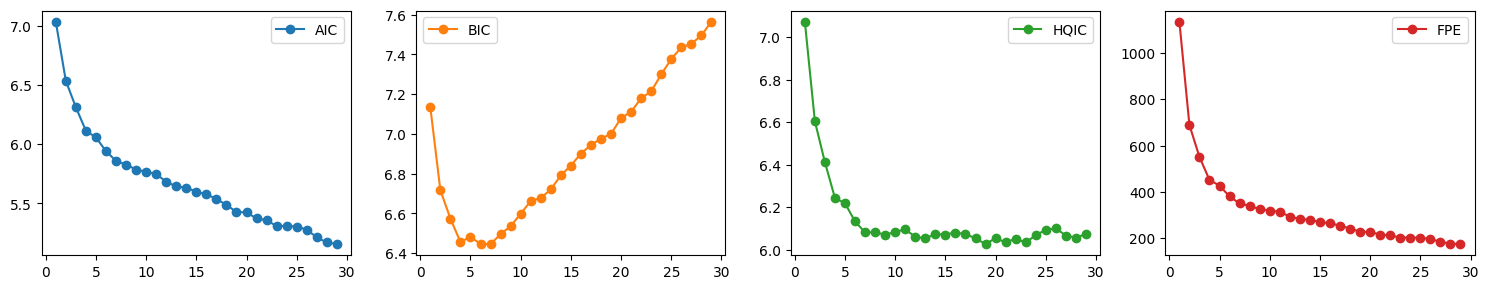

In [ ]:
aic, bic, fpe, hqic = [], [], [], []
model = VAR(train_diff_data)
p = np.arange(40,70)
for i in p:
    result = model.fit(i)
    aic.append(result.aic)
    bic.append(result.bic)
    fpe.append(result.fpe)
    hqic.append(result.hqic)
lags_metrics_df = pd.DataFrame({'AIC': aic,
                                'BIC': bic,
                                'HQIC': hqic,
                                'FPE': fpe},
                               index=p)
fig, ax = plt.subplots(1, 4, figsize=(15, 3), sharex=True)
lags_metrics_df.plot(subplots=True, ax=ax, marker='o')
plt.tight_layout()

In [ ]:
#tìm p-order phù hợp
model = VAR(train_diff_data)
for i in range(40, 70):
    results = model.fit(i)
    print(f'VAR Order {i}')
    print('AIC {}'.format(results.aic))
    print('BIC {}'.format(results.bic))
    print()

VAR Order 10
AIC 5.766302703359862
BIC 6.597737139455433

VAR Order 11
AIC 5.747818863008687
BIC 6.661124799900261

VAR Order 12
AIC 5.680924390417594
BIC 6.676237714511841

VAR Order 13
AIC 5.642620842783649
BIC 6.720077811423176

VAR Order 14
AIC 5.631054178016131
BIC 6.790791420877762



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
#tiến hành fit mô hình với p-order
model_fitted = model.fit(61)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 09, Jun, 2023
Time:                     08:12:26
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    6.67624
Nobs:                     958.000    HQIC:                   6.06000
Log likelihood:          -7962.54    FPE:                    293.325
AIC:                      5.68092    Det(Omega_mle):         240.267
--------------------------------------------------------------------
Results for equation Open
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.116756         0.081930            1.425           0.154
L1.Open          -1.306034         0.061416          -21.265           0.000
L1.High           0.410697         0.067722            6.064           0.000


In [ ]:
#Dự báo dữ liệu diff
lag_order = model_fitted.k_ar  # Lag order of the model
def forecase_diff_data(diff_data, org_data, lag_order):
	forecast_input = diff_data.values[-lag_order:]  # Last lag_order number of observations from train_diff_data
	fc = model_fitted.forecast(y=forecast_input, steps=30)
	index = pd.date_range(org_data.index[-1], periods=30, freq='B')  # Assuming business days frequency
	fc_df = pd.DataFrame(fc, index=index, columns=train_data.columns + '_forecast')
	return fc_df

In [ ]:
#Dự báo trên tập test và 30 ngày tiếp theo
fc_test_diff = forecase_diff_data(train_diff_data, train_data, lag_order)
fc_validate_diff = forecase_diff_data(test_diff_data, test_data, lag_order)
fc_30next_diff = forecase_diff_data(validate_diff_data, validate_data, lag_order)

In [ ]:
#Chuyển dữ liệu diff đã dự báo về dữ liệu gốc
def invert_transformation(train_data, fc_df, second_diff=False):
    """Revert differencing and invert the transformation to get the forecasted values back to the original scale."""
    fc = fc_df.copy()
    fc.index.name = "Date"
    columns = train_data.columns
    for col in columns:
        # Cumulative sum
        fc[col + '_forecast'] = train_data[col].iloc[-1] + fc[col + '_forecast'].cumsum()
        # Second differencing if applied
        if second_diff:
            fc[col + '_forecast'] = train_data[col].iloc[-lag_order - 1] + fc[col + '_forecast'].cumsum()
    return fc

In [ ]:
fc_test_org = invert_transformation(train_data, fc_test_diff, second_diff=False)
fc_validate_org = invert_transformation(test_data, fc_validate_diff, second_diff=False)
fc_30next_org = invert_transformation(validate_data, fc_30next_diff, second_diff=False)

In [ ]:
#Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((fc_test_org.Close_forecast.values - test_data.Close.head(30).values)**2))
validate_rmse = np.sqrt(np.mean((fc_validate_org.Close_forecast.values - validate_data.Close.head(30).values)**2))
print('Testing RMSE:', test_rmse)
print('Validate RMSE:', validate_rmse)

Testing RMSE: 86.2785842768514
Validate RMSE: 40.982475287092896


In [ ]:
test_mape = np.mean(np.abs((test_data.Close.head(30).values - fc_test_org.Close_forecast.values) / test_data.Close.head(30).values)) * 100
validate_mape = np.mean(np.abs((validate_data.Close.head(30).values - fc_validate_org.Close_forecast.values) / validate_data.Close.head(30).values)) * 100
print('Test MAPE:', test_mape)
print('Validate MAPE:', validate_mape)

In [ ]:
test_mae = mean_absolute_error(test_data.Close.head(30), fc_test_org.Close_forecast)
validate_mae = mean_absolute_error(validate_data.Close.head(30), fc_validate_org.Close_forecast)
print('Test MAE:', test_mae)
print('Validate MAE:', validate_mae)

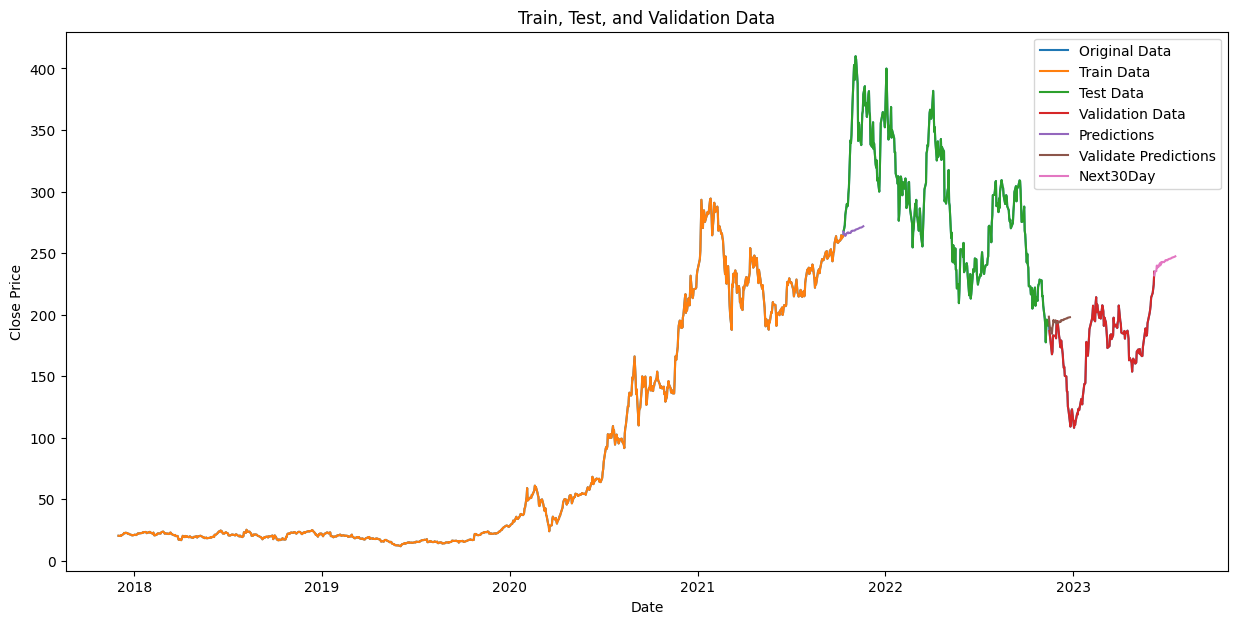

In [ ]:
#Trực quan hóa kết quả
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['Close'], label='Original Data')
plt.plot(train_data.index, train_data['Close'], label='Train Data')
plt.plot(test_data.index, test_data['Close'], label='Test Data')
plt.plot(validate_data.index, validate_data['Close'], label='Validation Data')
plt.plot(fc_test_org.index, fc_test_org['Close_forecast'], label='Predictions')
plt.plot(fc_validate_org.index, fc_validate_org['Close_forecast'], label='Validate Predictions')
plt.plot(fc_30next_org.index, fc_30next_org['Close_forecast'], label='Next30Day')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Train, Test, and Validation Data')
plt.legend()
plt.show()